# 딥러닝 (Week 3. Classification & Model Training II)

by Kyoungwon Seo (Dept. of Applied Artificial Intelligence, SeoulTech)
- e: kwseo@seoultech.ac.kr
- w: https://hai.seoultech.ac.kr

[Regression & Classification2] ♣ 수식 전부 다시 보기
1. [종류] 선형 회귀 (linear regression)
	- 1) 학습 방법
		- 해석적 방법
		- 경사 하강법
		- (1) 정규 방정식 (Normal Equation) ♣
			- 1] 개념 # 4-4
			- 2] 특징
		- (2) 경사 하강법 (Gradient Descent = GD)
			- 1] 개념
			- 2] 종류
				- [1] 배치 경사 하강법 (Batch Gradient Descent)
					- 1]] 개념 & 특징 # 4-6, 4-7
				- [2] 확률적 경사 하강법 (Stochastic Gradient Descent)
					- 1]] 개념 & 특징
					- 2]] 단점 해결책
				- [3] 미니배치 경사 하강법 (mini-batch Gradient Descent)
					- 1]] 개념 & 특징
				- [4] 경사 하강법 비교
			- 3] Learning Rate
				- [1] 특징
				- [2] 문제점
					- 1]] too small learning rate
					- 2]] too big learning rate
					- 3]] local minimum & global minimum
	- 2) 예시 # 4-1, 4-2
	- 3) 성능 측정
2. [종류] 다항 회귀 (polynomial regression)
	- 1) 개념
3. [학습] 학습 곡선 (learning curve)
	- 1) 개념
	- 2) 예시
		- (1) Underfitting인 경우
		- (2) Overfitting인 경우
	- 3) Variance-Bias TradeOff
		- (1) 배경 개념
		- (2) Variance-Bias TradeOff
		- (3) Early Stopping
4. [종류] 규제가 있는 선형 모델(Regularized Linear Model)
	- 1) 개념
	- 2) 종류
		- (1) 릿지 회귀 (Ridge Regression)
			- 1] 개념
			- 2] 비용 함수 # 4-8
			- 3] 특징
		- (2) 라쏘 회귀 (Lasso Regression)
			- 1] 개념
			- 2] 비용 함수 # 4-10
			- 3] 특징
		- (3) 엘라스틱넷 회귀 (Elasticnet Regression)
			- 1] 개념
			- 2] 비용 함수 # 4-12
			- 3] 전략 ♣
	- 3) 릿지 vs 라쏘 비교 ♣
		- (1) 릿지 회귀 (Ridge Regression)
		- (2) 라쏘 회귀 (Lasso Regression)
	- 4) Early Stopping
		- (1) 개념
		- (2) 방법
5. [종류] 로지스틱 회귀 (logistic regression)
	- 1) 개념
	- 2) 확률 추정
		- (1) 순서
		- (2) 확률 # 4-13
		- (3) 로지스틱 함수 ♣ # 4-14
		- (4) 확률 추정 # 4-15
	- 3) 훈련 & 비용 함수
		- (1) 방법
		- (2) 비용 함수 # 4-16, 4-17
		- (3) 그레디언트 벡터 (비용 함수의 편도함수) # 4-18
	- 4) 결정 경계
		- (1) 예시
6. [종류] 소프트맥스 회귀 (softmax regression)
	- 1) 개념
	- 2) 확률 추정
		- (1) 각 class의 소프트맥스 점수 # 4-19
		- (2) 소프트맥스 함수 # 4-20
		- (3) 최종 예측 # 4-21
	- 3) 훈련 & 비용 함수
		- (1) 방법
		- (2) 비용 함수 : 크로스 엔트로피 함수 # 4-22
		- (3) 그레디언트 벡터 (비용 함수의 편도함수) # 4-23
        
중요한 부분
  - 정밀도, trade off
  - ROC에 대한 이야기
  - 경사하강법 장단점
  - 규제에 대한 이야기
  - 조기 종료
  - 로지스틱 회귀는 개념적인 부분만 가져가면 된다

# 1. [종류] 선형 회귀 (linear regression)

## 1) 학습 방법

- 해석적 방법 : 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구하는 방법

- 경사 하강법(GD) : 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용함수를 훈련 세트에 대해 최소화(최적화)

## 2) 예측 함수

### (1) 예시

아래는 삶의 만족도에 대한 간단한 선형 회귀 모델

$삶의 만족도 = \boldsymbol{\theta}_0 + \boldsymbol{\theta}_1 \times 1인당 GDP$

- 이 모델은 입력 특성인 1인당GDP에 대한 선형 함수
- $\boldsymbol{\theta}_0$과 $\boldsymbol{\theta}_1$는 모델 파라미터
- 더 일반적으로 선형 모델은 [식 4-1]에서처럼 입력 특성의 가중치(weight or theta) 합과 편향(bias)이라는 상수를 더해 예측

**식 4-1: 선형 회귀 모델의 예측**

$\hat{y} = \boldsymbol{\theta}_0+\boldsymbol{\theta}_1x_1+\boldsymbol{\theta}_2x_2+  ... +\boldsymbol{\theta}_nx_n$



*   $\hat{y}$은 예측값
*   $n$은 특성의 수 ♣♣
*   $x_i$는 $i$번째 특성값 ♣♣
*   $\boldsymbol{\theta}_j$는 $j$번째 모델 파라미터 (편향 $\boldsymbol{\theta}_0$과 특성의 가중치 $\boldsymbol{\theta}_1, \boldsymbol{\theta}_2, ..., \boldsymbol{\theta}_n$을 포함)



이 식은 [식 4-2]처럼 벡터 형태로 더 간단하게 작성할 수 있음

**식 4-2: 선형 회귀 모델의 예측(벡터 형태)**

$\hat{y} = h_\boldsymbol{\theta}(x) = \boldsymbol{\theta}  \boldsymbol{\cdot} x$

*   $\boldsymbol{\theta}$는 편향 $\boldsymbol{\theta}_0$과 $\boldsymbol{\theta}_1$에서 $\boldsymbol{\theta}_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터 
*   $x$은 $x_0$에서 $x_n$까지 담은 샘플의 특성 벡터. $x_0$는 항상 1로써, 벡터표현으로 모델 파라미터와 특성을 모두 표현하기 위해 편향 $\boldsymbol{\theta}_0$에 가상의 특성 $x_0=1$이 곱해졌다고 생각하면 됨 ♣♣
*   $\boldsymbol{\theta} \boldsymbol{\cdot} x$는 벡터 $\boldsymbol{\theta}$와 $x$의 dot product. 이는 $\boldsymbol{\theta}_0x_0+\boldsymbol{\theta}_1x_1+\boldsymbol{\theta}_2x_2+ ...+\boldsymbol{\theta}_nx_n$와 같음
*  $h_\boldsymbol{\theta}$는 모델 파라미터 $\boldsymbol{\theta}$를 사용한 가설(hypothesis)함수



## 3) 성능 측정

- 모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것
- 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 함
  - 성능측정 지표: 평균 제곱근 오차(root mean square error, RMSE) 사용



## 1) 학습 방법 이어서

### (1) 정규방정식 (Normal Equation)

#### 1] 개념

- 비용 함수를 최소화하는 $\boldsymbol{\theta}$값을 찾기 위한 해석적인 방법
- [식 4-4]와 같은 수학 공식을 통해 계산

**식 4-4: 정규 방정식** ♣♣♣

*$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$*


*   $\hat{\boldsymbol{\theta}}$은 비용 함수를 최소화하는 ${\boldsymbol{\theta}}$ 값
*   $y$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타켓벡터




- 정규방정식 테스트를 위해 선형 데이터를 생성

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

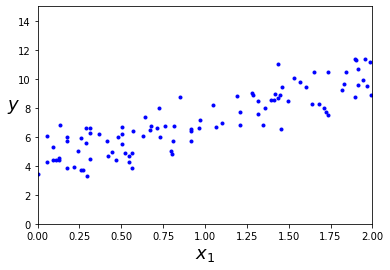

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.20497378],
       [2.99691742]])

- 위 결과는 기존 정답인 [4, 3]과 비교했을 때 정확하지는 않음(실제 손으로 문제를 풀이하면 정확한 값이 도출되지만, 컴퓨터에서 소수점 연산으로 오차 출력이 발생) ♣♣

- $\boldsymbol{\hat{\theta}}$을 사용해 예측

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.20497378],
       [10.19880862]])

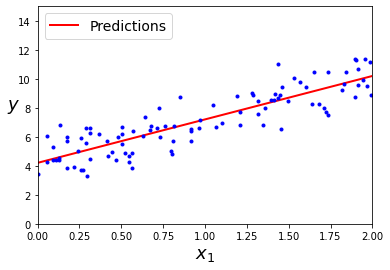

In [6]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

- 사이킷런에서 선형 회귀를 수행

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.20497378]), array([[2.99691742]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.20497378],
       [10.19880862]])

- `LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수도 있음

In [9]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.20497378],
       [2.99691742]])

- 위 함수는 $\mathbf{X}^+\mathbf{y}$을 계산함 ♣♣♣
  - $\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_ (pseudoinverse)
  - Moore–Penrose 유사역행렬
  - `np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있음

$\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.20497378],
       [2.99691742]])

#### 2] 특징 ♣♣♣

- 유사역행렬은 특잇값 분해(singular value decomposition, SVD)를 사용해 계산됨 ♣♣♣ 특잇값 분해 : 유사 역행렬, 주성분 도출에 사용
- 특이 행렬인 경우(즉, 역행렬이 없을 경우) 정규방정식을 사용할 수 없지만, 유사역행렬은 항상 구할 수 있음
- 계산복잡도(computational complexity)
  - 정규방정식은 (n+1)*(n+1) 크기가 되는 ${X}^T{X}$의 역행렬을 계산 (n은 특성 수)
  - 계산 복잡도는 일반적으로 $O(n^{2.4})$에서 $O(n^{3})$ 사이 ➝ 특성수가 두 배로 늘면 계산 시간이 5.3~8배 증가 ♣♣
  - 사이킷런의 LinearRegression 클래스의 계산복잡도는 $O(n^{2})$
  - 모델을 개발하는 경우 계산복잡도를 반드시 고려해야한다
- 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 경우 ➝ 경사 하강법 활용 ♣♣♣


## 1) 학습 방법 이어서

### (2) 경사 하강법(Gradient descent, GD)

#### 1] 개념

- 경사 하강법(GD)은 여러 종류의 문제에서 최적의 해법을 찾는 일반적인 최적화 알고리즘
- 경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

#### 2] 종류

- 학습률 하이퍼파라미터로 결정되는 스텝의 크기가 중요

  - **배치 경사 하강법**: 매 스텝에서 전체 훈련 세트를 사용해 그레디언트를 계산. 훈련 세트가 커지면 매우 느려짐 ♣
  - **확률적 경사 하강법**: 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산 ♣♣
  - **미니배치 경사 하강법**: 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산 ♣♣

#### 3] learning rate

##### [1] 특징

- 아래 그림은 경사 하강법 그림으로 모델 파라미터가 무작위하게 초기화된 후 반복적으로 수정되어 비용 함수(예, MSE)를 최소화
- 학습 스텝 크기는 비용 함수의 기울기에 비례 (따라서 파라미터가 최솟값에 가까워질수록 스텝 크기가 점진적으로 감소)

<img src="https://drive.google.com/uc?export=view&id=1uqo1tvaLEipekriPGaR_jb2lHEln_z_r">


##### [2] 문제점

1]] too small learning rate

- 경사 하강법에서 주용한 파라미터는 스텝의 크기로, 학습률(learning rate) 하이퍼파라미터로 결정됨
- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림 (아래 그림 참조)

<img src="https://drive.google.com/uc?export=view&id=1W_gLB8nrA_Ysl4AIA6lRpa5dMc-07j40">

2]] too big learning rate

- 반대로 학습률이 너무 크면 골짜기를 가로 질러 반대편으로 건너 뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모름 (아래 그림 참조)

<img src="https://drive.google.com/uc?export=view&id=1zdxB5k-cfh50ay-T8Ks7oWIXiJALOMnl">


3]] local minimum & global minimum

- 모든 비용 함수가 매끄한 그릇과는 같지 않음. 아래 그림처럼 경사 하강법의 두 가지 문제점을 보여줌
  - 무작위 초기화(Random initialization) 때문에 알고리즘이 왼족에서 시작하면 전역 최솟값(global minimum)보다 덜 좋은 지역 최솟값(local minimum)에 수렴

<img src="https://drive.google.com/uc?export=view&id=1HNKDRrVy-VFJWffYjjqanNrCoalf1lll">


- 다행히 선형 회귀를 위한 MSE 비용 함수는 볼록 함수(convex function)이기 때문에 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장함 ♣


#### 2] 종류 이어서

##### [1] 배치 경사 하강법 (Batch Gradient Descent)

1]] 개념 2]] 특징

- 경사 하강법을 구현하려면 각 모델 파라미터 $\boldsymbol{\theta}_j$에 대해 비용 함수의 그레디언트를 계산해야함 
  - $\boldsymbol{\theta}_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 함
  - 이를 편도함수(partial derivative)라고 함 ♣♣♣♣
  - 편도 함수를 수식으로 표현하면 아래 [식 4-6]과 같음

**식 4-6: 비용 함수의 그레이디언트 벡터** ♣♣♣♣

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

- 위 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 $X$에 대해 계산
  - 그래서 이 알고리즘을 ***배치 경사 하강법(batch gradient descent)***이라고 함
  - 매 스텝에서 훈련 데이터 전체를 사용 (이런 이유로 매우 큰 훈련 세트에서 아주 느림)

- 내려가는 스텝의 크기를 결정하기 위해 그레이디언트 벡터에 $\eta$를 곱함 [식 4-7].


**식 4-7: 경사 하강법의 스텝** ♣♣

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


- 위 수식을 간단히 코드로 구현

In [11]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.20497378],
       [2.99691742]])

In [13]:
X_new_b.dot(theta)

array([[ 4.20497378],
       [10.19880862]])

- 여러 가지 학습률에 대한 경사 하강법

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

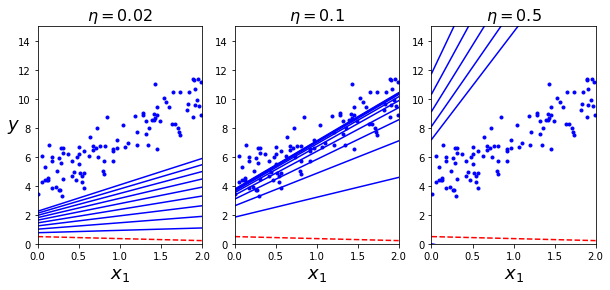

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

#### [2] 확률적 경사 하강법 (stochastic gradient descent, SGD)

1]] 개념 2]] 특징

- 배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레디언트를 계산 한다는 점 (그 결과 훈련 세트가 커지면 매우 느려지게 됨)
- ***확률적 경사 하강법***은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산
  - 장점 
    - 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 훨씬 빠름
    - 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음) ♣
  - 단점 
    - 확률적이기 때문에 알고리즘은 배치 경사 하강법보다 훨씬 불안정
    - 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래 요동치면서 평균적으로 감소
    - 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착 하지 못할 것 ♣♣

3]] 단점 해결책

- SGD의 무작위성에 대한 해결책: 학습률을 점진적으로 감소시키는 것 ♣♣♣
  - 담금질 기법(simulated annealing): 시작할 때는 학습률을 크게 하고 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함 ♣♣
  - 학습 스케줄(learning schedule): 매 반복에서의 학습률을 결정

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

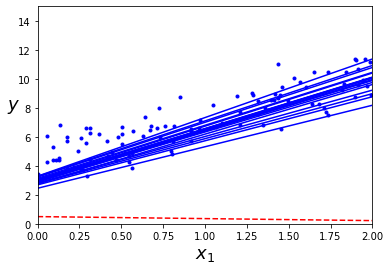

In [17]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

# 일반적으로 한 반복에서 m번 되풀이 되고, 이때 각 반복을 에포크 라고 합니다. 
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
plt.show()                                           # 책에는 없음

In [18]:
theta

array([[4.16063386],
       [3.06223234]])

- 아래는 사이킷런의 SGD 방식으로 기본 학습 스케줄을 사용

In [19]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.26246421]), array([3.09686689]))

#### [3] 미니배치 경사 하강법 (mini-batch gradient descent)

1]] 개념 2]] 특징

- 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산
- 장점
  - 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상 ♣♣♣
  - 미니배치를 어느 정도 크게 하면 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임 ♣

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[4.21459294],
       [3.02069919]])

#### [4] 경사 하강법 비교

- 세 가지 경사 하강법 알고리즘이 훈련 과정동안 파라미터 공간에서 움직인 경로 비교

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

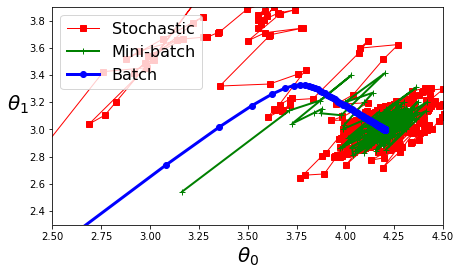

In [24]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

- 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에 멈춘 반면 확률적 경사 하강법과 미니배치 경사하강법은 근처에서 맴돌고 있음
- 그렇지만 배치 경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달할 수 있음 ♣♣

## 2. [종류] 다항 회귀 (polynomial regression)

### 1) 개념

- 보유한 데이터가 단순한 직선 보다 복잡한 형태라면? 
  - **다항 회귀**
    - 비선형 데이터를 학습하는 데 선형 모델을 사용
    - 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련 ♣♣

- 예제: 간단한 2차방정식(quadratic equation)으로 비선형 데이터를 생성하여 다항회귀 예측

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

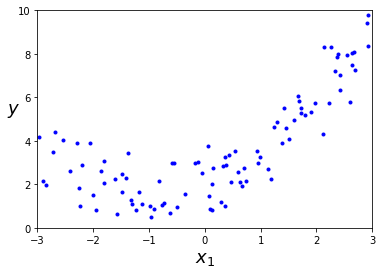

In [26]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_data_plot")
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [28]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

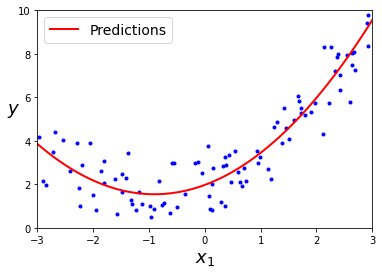

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()

- 고차 다항 회귀(즉, degree > 2)를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것
- 예를 들어 아래 예제 코드 처럼 300차 다항 회귀 모델을 이전의 훈련 데이터에 적용

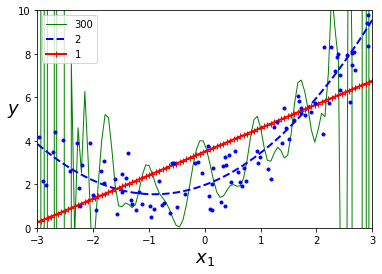

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("high_degree_polynomials_plot")
plt.show()

- 단순한 선형 모델 이나 2차 모델과 결과를 비교해보면 300차 다항 회귀 모델은 훈련 샘플에 가능한 가까이 가려고 구불구불하게 나타남
- 이 고차 다항 회귀 모델은 심각하게 훈련 데이터에 ***과대적합(over-fitting)*** 되었음
  - 모델의 일반화 성능을 추정하기 위해 교차 검증(cross-validation)을 사용
  - 나아가 ***학습 곡선 (learning curve)*** 활용할 수 있음

## 3. [학습] 학습 곡선 (learning curve)

### 1) 개념 ♣♣

- 학습 곡선은 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타냄
- 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨
- 아래 코드는 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

### 2) 예시

### (1) Underfitting인 경우

- 단순 선형 회귀 모델의 학습 곡선

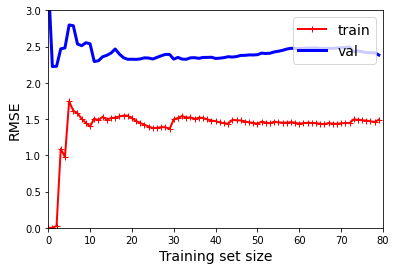

In [33]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
# save_fig("underfitting_learning_curves_plot")   # 책에는 없음
plt.show()                                      # 책에는 없음

- 위는 과소적합된 모델의 전형적인 모습
- 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접
  - 모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과가 없음 ♣♣ 과대적합인 경우 훈련 샘플을 더 추가하면 효과 발휘
  - 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 함 ♣♣

### (2) Overfitting인 경우

- 다음은 10차 다항 회귀 모델의 학습 곡선

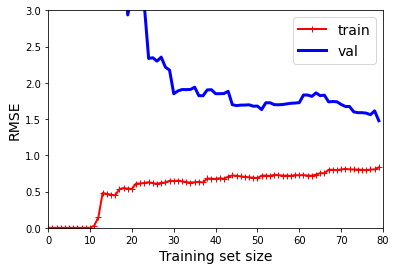

In [34]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 없음
# save_fig("learning_curves_plot")  # 책에는 없음
plt.show()                        # 책에는 없음

- 이 학습 곡선은 이전과 비슷해 보이지만 두 가지 매우 중요한 차이점이 있음 ♣♣
  - 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
  - 두 곡선 사이에 공간이 있음 (과대적합 모델의 특징). 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워 짐 ♣♣♣
  - 과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것 ♣♣

### 3) Bias-Variance TradeOff

### (1) 배경 개념

- 편향/분산 트레이드오프
(출처: https://datacookbook.kr/48)
  - 편향(bias): 잘못된 과정으로 인한 것 (편향이 큰 모델은 훈련 데이터에 과소적합)
  - 분산(variance): 훈련 데이터의 작은 변동에 모델이 과도하게 민감하게 반응 (분산이 큰 모델은 훈련 데이터에 과대적합)
  - 줄일 수 없는 오차(irreducible error): 데이터 자체에 있는 잡음 때문에 발생 (예: 고장난 센서 등)

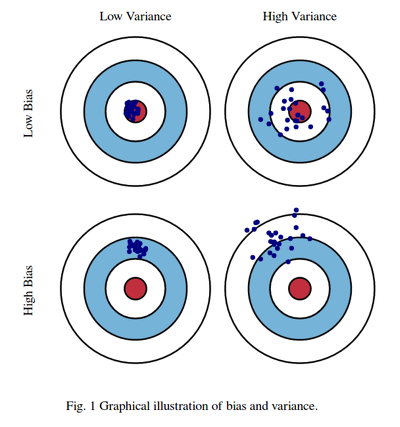

### (2) Bias-Variance TradeOff

- 모델 학습과 모델 복잡도(model complexity)
  - 학습을 시킬수록 (=모델 복잡도가 올라갈 수록) Bias(편향)은 줄어드나(↓)  Variance(분산)는 올라감(↑)
  - 학습이 덜될수록 (=모델 복잡도가 낮을수록) Bias(편향)은 올라가나(↑) Variance(분산)는 내려감(↓)

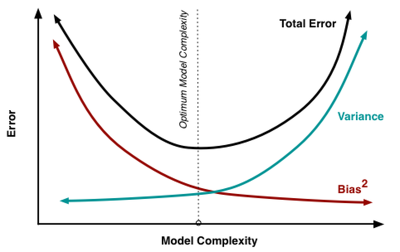

### (3) Early Stopping

- Variance와 Bias간의 Trade-off 때문에 모델을 계속 학습 시킨다고 해서 전체 Error가 줄어들지 않음
- 편향/분산 트레이드오프를 고려해 가장 낮은 지점을 찾아 early stopping 해야함

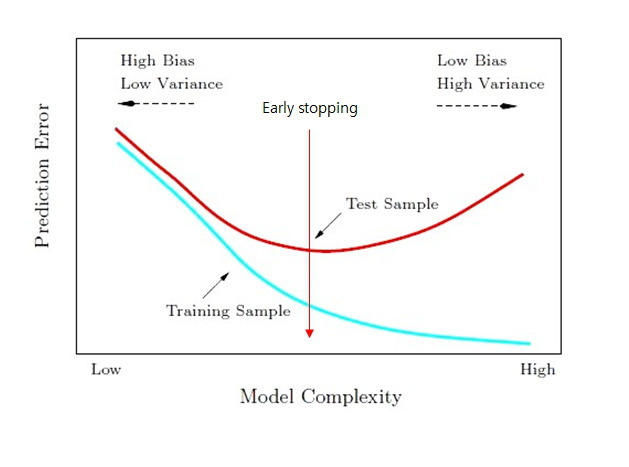

## 4. [종류] 규제가 있는 선형 모델(Regularized Linear Model)

### 1) 개념

- 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것 (즉, 모델을 제한)
- 자유도를 줄이면 데이터에 과대적합되기 더 어려워짐 (다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소 시키는 것)
- 선형회귀모델의 가중치 제한 규제를 통해 과대적합을 막을 수 있음
- Loss를 줄일 때, Parameter를 엄청 크게 만들어 주는 방향으로 가는 것을 억제
- 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력
- 모델의 훈련이 끝나면 규제가 없는 성능 지표로 평가 ♣

### 2) 종류

- 릿지 회귀(Ridge regression = Tikhonov 규제)
- 라쏘 회귀(Least absolute shrinkage and selection operator, Lasso)
- 엘라스틱넷(Elastic net)

### (1) 릿지 회귀(Ridge regression)

#### 1] 개념

- 릿지회귀(또는 티호노프 Tikhonov 규제)는 규제가 추가된 선형 회귀버전
- 규제항 $ \alpha\sum\limits_{i=1}^{n}{\theta_i}^2$을 비용 함수에 추가 (규제항은 훈련하는 동안에만 비용 함수에 추가됨 / 테스트할 때는 비용 함수에 추가되면 안됨) ♣♣

#### 2] 비용함수

**식 4-8: 릿지 회귀의 비용 함수** ♣♣

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$

*   $n$은 특성의 수 ♣♣
*   $\boldsymbol{\theta}_i$는 $i$번째 모델 파라미터 (편향 $\boldsymbol{\theta}_0$과 특성의 가중치 $\boldsymbol{\theta}_1, \boldsymbol{\theta}_2, ..., \boldsymbol{\theta}_n$을 포함). ♣♣
*   $\alpha$는 모델을 얼마나 많이 규제할지 조절
  - $\alpha=0$이면 선형회귀
  - $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 수평선이 됨

#### 3] 특징

- 릿지 회귀는 입력 특성의 스케일에 민감함 ➝ 스케일 맞추기 (StandardScaler) ♣♣

In [35]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [36]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [37]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

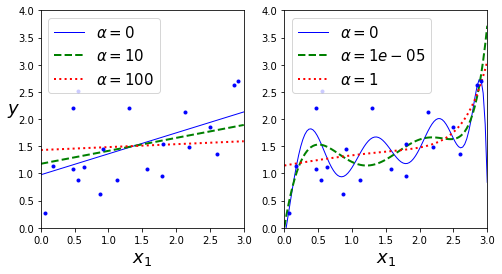

In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

- 릿지 회귀에서 $\alpha$를 증가시킬수록:
  - 모델이 직선에 가까워짐
  - 모델의 분산은 줄지만 편향은 커지게 됨

- 확률적 경사 하강법(SGDRegressor)에 penalty 매개변수를 통해 l2 규제 (릿지 회귀) 사용

In [39]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

### (2) 라쏘 회귀 (Least absolute shrinkage and selection operator, Lasso)

#### 1] 개념

- 선형 회귀의 또 다른 규제된 버전
- 릿지 회귀처럼 비용 함수에 규제항을 더하지만 L2-norm의 제곱을 2로 나눈 것 대신 가중치 벡터의 L1-norm을 사용 [식 4-10] ♣♣

#### 2] 비용함수

**식 4-10: 라쏘 회귀의 비용 함수** ♣♣

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$

- 라쏘 회귀 예제

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


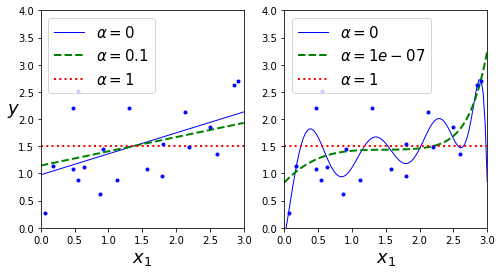

In [40]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

#### 3] 특징

- 라쏘 회귀의 중요한 특징
  - 덜 중요한 특성의 가중치를 제거하려고 함 (즉 가중치가 0이 됨)
  - 예를 들어 위 그래프에서 점선($\alpha = 10^{-7}$)은 2차방정식처럼 보이며 거의 선형적 (차수가 높은 다항 특성의 가중치가 모두 0이 되었음)
  - 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델(sparse model)을 만듦 (즉, 0이 아닌 특성의 가중치가 적음) ♣♣♣

In [41]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### 3) 릿지 vs 라쏘 비교

- L1과 L2의 패널티 그리고 라쏘, 릿지 회귀 모델 비교

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [43]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

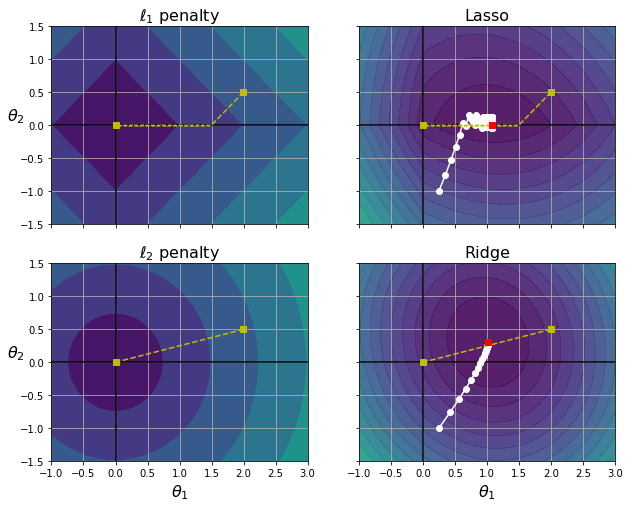

In [44]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

# save_fig("lasso_vs_ridge_plot")
plt.show()

두 축은 모델 파라미터 두개를 나타내고 등고선은 각기 다른 손실 함수를 나타냄 ♣♣♣

### (1) 라쏘 회귀

- 왼쪽 위 그래프의 등고선은 L1 손실($|\boldsymbol{\theta_1}|+|\boldsymbol{\theta_2}|$)
  - 축에 가까워지면서 선형적으로 줄어 듦
  - 예를 들어 모델 파라미터를 $\boldsymbol{\theta_1}=2, \boldsymbol{\theta_2}=0.5$로 초기화하고 경사 하강법을 실행하면 두 파라미터가 동일하게 감소될 것(노란 점선)
  - 따라서 $\boldsymbol{\theta_2}$가 먼저 0에 도달 ($\boldsymbol{\theta_2}$가 시작할 때 0에 더 가깝기 때문) 
  - 그다음 경사 하강법이 $\boldsymbol{\theta_1}=0$에 도달할 때까지 축을 따라 내려감 (L1의 그레디언트는 0에서 정의되지 않기 때문에 진동이 조금 있음. 이 지점에서 그레디언트는 -1 또는 1) ♣♣♣
- 오른쪽 위 그래프 등고선은 라쏘 손실함수
  - 하얀 작은 원이 경사 하강법이 $\boldsymbol{\theta_1}=0.25, \boldsymbol{\theta_2}=-1$로 초기화된 모델 파라미터를 최적화하는 과정을 보여줌
  - $\boldsymbol{\theta_2}=0$으로 빠르게 줄어들고 그다음 축을 따라 진동하면서 전역 최적점(빨간 사각형)에 도달함 ➝ 어떻게 진동을 막을 수 있을까? ♣♣♣
  - $\alpha$를 증가하면 전역 최적점이 노란 점선을 따라 왼쪽으로 이동함 ♣♣♣
  - $\alpha$를 감소하면 전역 최적점이 오른쪽으로 이동함 ♣♣♣

### (2) 릿지 회귀

- 왼쪽 아래 그래프는 L2 손실
  - 경사 하강법이 원점까지 직선 경로를 이동
- 오른쪽 아래 그래프의 등고선은 릿지 회귀의 비용 함수 (L2손실을 더한  MSE 손실함수)
  - 라쏘와 다른점은 크게 두가지
    - 첫째, 파라미터가 전역 최적점에 가까워질수록 그레디언트가 작아짐 ➝ 경사 하강법이 자동으로 느려지고 수렴에 도움이 됨 (진동이 없음) ♣♣♣
    - 둘째, $\alpha$를 증가시킬수록 최적의 파라미터(빨간 사각형)가 원점에 더 까까워짐 (하지만 완전히 0이 되지는 않음) ♣

### 2) 종류 이어서

### (3) 엘라스틱넷 (Elastic net)

#### 1] 개념

- 엘라스틱넷은 릿지회귀와 라쏘회귀를 절충한 모델
- 릿지회귀와 라쏘회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 $r$을 사용해 조절
- $r=0$이면 엘라스틱넷은 릿지 회귀와 같고, $r=1$이면 라쏘 회귀와 같음 [식 4-12]

#### 2] 비용함수

**식 4-12: 엘라스틱넷 비용 함수** ♣♣

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$

In [45]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

#### 3] 전략

선형 회귀(규제가 없는 모델), 릿지, 라쏘, 엘라스틱넷을 언제 사용해야 할까?
- 적어도 규제가 약간 있는 것이 대부분 좋으므로 평범한 선형 회귀는 피하는 것이 좋음
- 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 ➝ 라쏘, 엘라스틱넷 ♣♣♣
- 데이터의 특성 수가 훈련 샘플 수 보다 많거나 특성 몇 개가 강하게 연관되어 있을 때 ➝ 엘라스틱넷 ♣♣♣

### 4) 조기 종료 (early stopping)

#### (1) 개념

- 검증 에러가 최솟값에 도달하면 바로 훈련을 중지

- 예제 코드: 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [47]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

- 그래프를 그립니다:

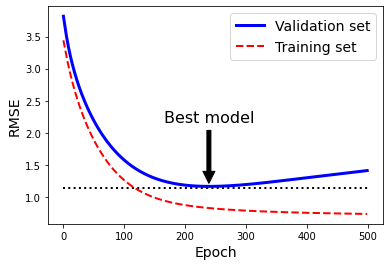

In [48]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
# save_fig("early_stopping_plot")
plt.show()

#### (2) 방법

- Validation set에서 감소하던 RMSE가 증가 ➝ 과대적합되기 시작하는 것을 의미
- 조기종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈춤 ➝ Geoffrey Hinton "Beautiful free lunch"
- Tip: 
  - 확률적 경사 하강법이나 미니배치 경사 하강법에서는 곡선이 그리 매끄럽지 않아 최솟값에 도달했는지 확인 하기 어려울 수 있음 
  - 한 가지 해결책은 검증 에러가 일정 시간 동안 최솟값보다 클 때 (모델이 더 나아지지 않는다고 확신이 들 때) 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌리는 것

In [49]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

## 5. [종류] 로지스틱 회귀 (logistic regression)

### 1) 개념

- 어떤 회귀 알고리즘은 분류에 활용할 수 있음
- 로직스틱 회귀(로짓 회귀, logit regression)는 샘플이 특정 클래스에 속할 확률을 추정
  - 예: 이메일이 스팸일 확률은 얼마인가? 
  - 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측
    - 레이블이 '1'인 양성 클래스(positive class)
    - 또는 클래스에 속하지 않는다고 예측 (즉, 레이블이 '0'인 음성 클래스, negative class) 
  - 이를 이진 분류기(binary classifier)라고 함 ♣♣

### 2) 확률 추정

### (1) 순서

- 로지스틱 회귀의 동작 원리 ♣♣
  - 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산 (그리고 편향을 더함)
  - 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결과값의 로지스틱(logistic)을 출력 [식 4-13]

### (2) 확률

**식 4-13: 로지스틱 회귀 모델의 확률추정(벡터 표현식)** ♣♣


$\hat{\rho}=h_\theta(\mathbf{x})=\sigma (\theta^T\mathbf{x} )$


### (3) 로지스틱 함수

- 로지스틱($\sigma (\cdot)$으로 표시)은 0과 1 사의 값을 출력하는 시그모이드 함수(sigmoid function) (즉 S형태) ♣♣
- 이 함수는 [식 4-14]와 같이 정의

식 4-14 로지스틱 함수 ♣♣♣

$\sigma(t)=\frac{1}{1+exp(-t)} $

- 로지스틱 함수 시각화:

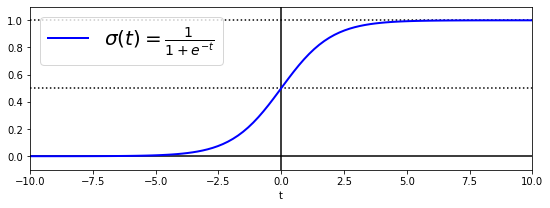

In [51]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### (4) 확률 추정

- 로지스틱 회귀 모델이 샘플 $\mathbf{x}$가 양성 클래스에 속할 활률 $\hat{\rho}=h_\theta(\mathbf{x})$를 추정하면 이에 대한 예측 $\hat{y}$을 구할 수 있음 [식 4-15]


식 4-15 로지스틱 회귀 모델 예측

$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5 일때 \\
  1 & \text{if } \hat{p} > 0.5 일때
\end{cases}
$


- t < 0이면 $\sigma(t)$ < 0.5이고, $t\geq0$이면  $\sigma(t) \geq 0.5$ ♣♣♣
- 따라서 로지스틱 회귀 모델은 $\mathbf{\theta}^T\textbf{x}$ 가 양수 일때 1 (양성 클래스) 이라고 예측하고, 음수일 때 0 (음성 클래스)이라고 예측

### 3) 훈련 & 비용 함수

### (1) 방법

- 로지스틱 회귀 모델의 훈련
  - 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고, 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것 ♣♣
  - 하나의 훈련 샘플 $\mathbf{x}$에 대해 나타낸 비용 함수 [식 4-16]

### (2) 비용함수

#### 1] 1개 훈련 샘플

**식 4-16: 하나의 훈련 샘플에 대한 비용 함수** ♣♣

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$


- 위 비용 함수는 $t$가 0에 가까워지면 $-\log(t)$가 매우 커짐
- 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가할 것
- 음성 샘플을 1에 가가운 확률로 추정해도 비용이 증가할 것
- 반면에 $t$가 1에 가까우면 $-\log(t)$는 0에 가까워짐
- 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워질 것 ♣

#### 2] 모든 훈련 샘플

- 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것 ➝ 이를 로그 손실(log loss)라 부르며 [식 4-17]으로 표시


**식 4-17: 로지스틱 회귀 비용 함수(로그 손실)** ♣♣

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

- 위 비용 함수의 최솟값을 계산하는 알려진 해가 없음 (정규방정식이 없음) ♣♣♣
- 대신 이 비용 함수는 "볼록 함수"이므로 경사 하강법이 전역 최솟값에 가까워지는 것을 보장(학습률이 너무 크지 않고 충빈히 기다릴 시간이 있다면) ♣♣♣
- 이 비용 함수의 $j$번째 모델 파라미터 $\theta_j$에 대해 편미분을 하면 [식 4-18]과 같음 ♣♣♣

### (3) 그레디언트 벡터 (비용 함수의 편도함수)

**식 4-18: 로지스틱 비용 함수의 편도 함수** ♣♣♣♣

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

- 이 식은 각 샘플에 대해 예측 오차를 계산하고 $j$번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균을 계산함 ♣♣
- 모든 편도함수를 포함한 그레디언트 벡터를 만들면 배치 경사 하강법 알고리즘을 사용할 수 있음

### 4) 결정 경계

### (1) 예시

- 로지스틱 회귀 관련 붓꽃 데이터셋을 사용
- 이 데이터셋은 세 개의 품종, Iris-Setosa, Iris-Versicolor, Iris-Virginica에 속하는 붓꽃 150개의 꽃잎(petal)과 꽃받침(sepal)이 너비와 길이를 담고 있음

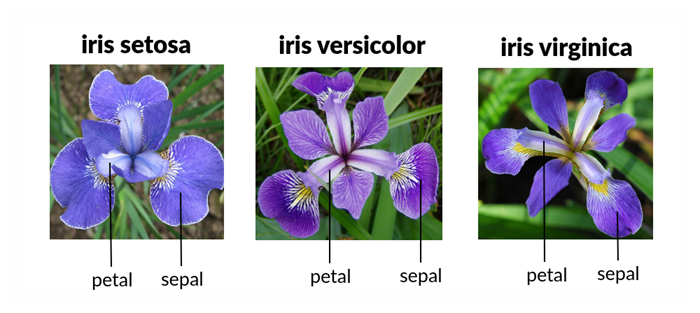

In [52]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [53]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [54]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

- 로지스틱 회귀 모델 훈련

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

- 꽃잎의 너비가 0~3 cm 꽃에 대해 모델의 추정 확률을 계산

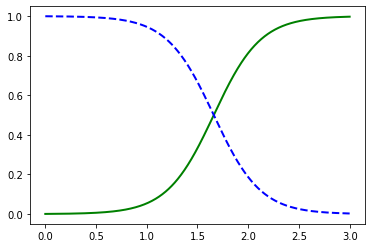

In [56]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

- 결정 경계 (decision boundary) 표시

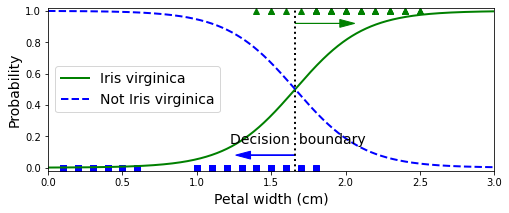

In [57]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

- 해석
  - Iris-Verginica (삼각형 표시)의 꽃잎 너비는 1.4-2.5cm에 분포
  - 반면 다른 붓꽃(사각형 표시)는 일반적으로 꽃잎 너비가 더 작아 0.1~1.8cm에 분포
  - 약간 중첩되는 부분이 있음
  - 꽃잎 너비가 2cm 이상인 꽃은 분류기가 Iris-Verginica라고 강하게 확신 (이 클래스에 대해 높은 확률을 출력)
  - 반면 1 cm 아래면 Iris-Verginica가 아니라고 강하게 확신 ('Iris-Verginica 아님'클래스에 대한 확률이 높음) 
  - 이 두 극단 사이에서는 분류가 확실하지 않지만 가장 가능성 높은 클래스를 반환할 것
  - 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계(decision boundary) 생성 ♣♣
    - 꽃잎 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류
    - 그보다 작으면 아니라고 예측 (아주 확실하지 않더라도)

In [58]:
decision_boundary

array([1.66066066])

In [59]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

- 꽃잎 너비와 꽃잎 길이 두 개의 특성을 이용하여 로지스틱 회귀를 수행:

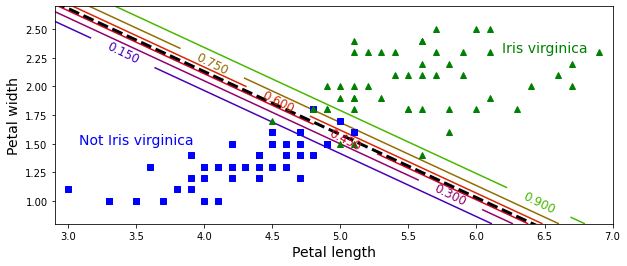

In [60]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

## 6. [종류] 소프트맥스 회귀 (softmax regression)

### 1) 개념

- 로지스틱 회귀 모델은 여러 개의 이진 분류기(binary classifier)를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원 (이를 소프트맥스 회귀(softmax regression) 또는 다항 로지스틱 회귀(multinomial logistic regression)라고 함)
  - 샘플 $\mathbf{x}$가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 $k$에 대한 점수 $s_k(\mathbf{x})$를 계산 [식 4-19]
  - 점수에 소프트맥스 함수(softmax function) 또는 정규화된 지수 함수(normalized exponential function)를 적용해 각 클래스 확률 추정 ♣♣♣

### 2) 확률 추정

### (1) 각 class의 소프트맥스 점수

**식 4-19: 클래스 $k$에 대한 소프트맥수 점수** ♣♣♣

$s_k(\mathbf{x})$ = $(\theta^{(k)})^T\mathbf{x}$


- 각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 있음 ♣♣
- 이 벡터들은 파라미터 행렬(parameter matrix) $\Theta$에 행으로 저장됨 ♣♣

### (2) Softmax 함수

- 샘플 $\mathbf{x}$에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수 [식 4-20]를 통과시켜 클래스 $k$에 속할 확률 $\hat{p}_k$을 추정
- 이 함수는 각 점수에 지수 함수를 적용한 후 정규화 (즉, 모든 지수 함수 결과의 합으로 나눔) ♣♣♣
- 이러한 결과값을 로짓(logit) 또는 로그-오즈(log-odds)라고 부름 ♣♣♣

**식 4-20: 소프트맥스 함수** ♣♣♣

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

*   $K$는 클래스 입니다. 
*   $\mathbf{s}(\mathbf{x})$는 샘플 $\mathbf{x}$에 대한 각 클래스의 점수를 담은 벡터입니다. ♣♣♣
*   $\sigma\left(\mathbf{s}(\mathbf{x})\right)_k$는 샘플 $\mathbf{x}$에 대한 각 클래스의 점수가 주어졌을 때 이 샘플의 클래스 $k$에 속할 추정 확률 입니다. ♣♣♣


- 로지스틱 회귀 분류기처럼 소프트맥스 회귀 분류기는 [식 4-21]처럼 추정 확률이 가장 높은 클래스(그냥 가장 높은 점수를 가진 클래스)를 선택

### (3) 최종 예측

**식 4-21: 소프트맥스 회귀 분류기의 예측** ♣♣

$\hat{y} = \underset{k}{\textbf{argmax}}(\sigma\left(\mathbf{s}(\mathbf{x})\right)_k) = \underset{k}{\textbf{argmax}}(\mathbf{s_k}(\mathbf{x})) = \underset{k}{\textbf{argmax}}((\mathbf{\theta^{(k)})^T}\mathbf{x})$

- argmax 연산은 함수를 최대화하는 변수의 값을 반환 ♣♣♣
- 이식에서는 추정 확률 $\sigma\left(\mathbf{s}(\mathbf{x})\right)_k$가 최대인 $k$값을 반환 ♣♣♣

### 3) 훈련 & 비용함수

### (1) 방법

Tip: 소프트 맥스 회귀 분류기는 한 번에 하나의 클래스만 예측(즉, 다중 클래스(multiclass)지 다중출력(multioutput)은 아님). 그래서 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서만 사용해야 함. 하나의 사진에서 여러 사람의 얼굴을 인식하는 데는 사용할 수 없음. ♣♣♣

- 소프트맥스 회귀 모델 훈련 방법
  - 모델이 타깃 클래스에 대해서는 높은 확률을(그리고 다른 클래스에 대해서는 낮은 확률을)추정 하도록 만드는 것이 목적
  - [식 4-22]의 크로스 엔트로피(cross entropy)비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합
  - 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용됨 ♣♣♣

### (2) 비용함수 : 크로스 엔트로피

**식 4-22: 크로스 엔트로피 비용 함수** ♣♣♣

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

* 이 식에서는 $y_k^{(i)}$는 $i$번째 샘플이 클래스 $k$에 속할 타깃 확률 ♣♣♣
* 일반적으로 샘플이 클래스에 속하는지 아닌지에 따라 1 또는 0이 됨 ♣♣♣

크로스 엔트로피 관련 자세한 내용은 동영상을 참고

https://homl.info/xentropy

- 딱 두 개의 클래스가 있을 때 (K=2) 이 비용 함수는 로지스틱 회귀의 비용 함수와 같음 ♣♣♣
- 이 비용 함수의 $\theta^{(k)}$에 대한 그레이디언트 벡터는 [식 4-23]과 같음

### (3) 그레디언트 벡터(비용함수의 편도함수)

**식 4-23: 클래스 k에 대한 크로스 엔트로피의 그레디언트 벡터** ♣♣♣♣

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

- 각 클래스에 대한 그레디언트 벡터를 계산할 수 있으므로 비용 함수를 최소화하기 위한 파라미터 행렬 $\Theta$를 찾기 위해 경사 하강법(또는 다른 최적화 알고리즘)을 사용

- 소프트맥스 회귀를 사용해 붗꽃을 세 개의 클래스로 분류
  - 사이킷런의 Logistic Regression은 클래스가 둘 이상일 때 기본적으로 OvA(일대다 전략)을 사용
  - multi_class 매개 변수를 "multinomial"로 바꾸면 소프트맥스 회귀를 사용할 수 있음 ♣♣♣
  - 소프트맥스 회귀를 사용하려면 solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 함 ♣♣♣

- 예제 코드:

In [61]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

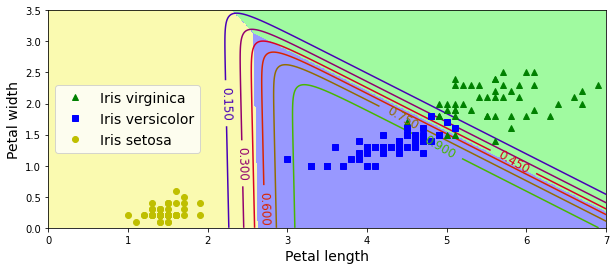

In [62]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()

- 결정 경계를 배경색으로 구분
- 클래스 사이의 결정 경계가 모두 선형 ♣♣♣
- Iris-Versicolor 클래스에 대한 확률을 곡선으로 나타냈음 (즉, 0.450인 직선은 45% 확률 경계를 나타냄) ♣♣♣
- 모든 결정 경계가 만나는 지점에서는 모든 클래스가 동일하게 33%의 추정 확률을 가짐 ♣♣♣

In [63]:
# 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정하고 이 붓꽃의 품종이 무엇인지 모델에 질의하면 94.2%의 확류로 Iris-Virginica (클래스 2)라고 (또는 5.8% 확률로 Iris-Versicolor라고) 출력할 것입니다.
softmax_reg.predict([[5, 2]])

array([2])

In [64]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])